# Latant Dirichlet Allocation from scratch

# Importing Libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import pickle5 as pickle
import csv

## Loading the Data set and Building Vocabulary and Finding Rare Words present

In [4]:
n_samples = 10000

data = pd.read_csv('Data.csv')['Abstract']
data_samples = data[:n_samples]

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=1,
                                max_features=10000,
                                stop_words='english')
data_tf = tf_vectorizer.fit_transform(data_samples)

vocabulary = tf_vectorizer.vocabulary_

words = list(vocabulary.keys())
rare_words = []
words_count = np.sum(data_tf.toarray(), axis = 0)
for i,word_count in enumerate(words_count):
    if word_count<10:
        rare_words.append(words[i])
print('Number of Rare Words::',len(rare_words))
print(rare_words)


Number of Rare Words:: 176
['interpretable', 'distribution', 'single', 'number', 'ask', 'used', 'degree', 'nature', 'developed', 'exact', 'specific', 'explanation', 'parameter', 'adding', 'observed', 'increasing', 'optimization', 'usable', 'nodes', 'ddos', 'legitimate', 'security', 'super', 'years', 'texture', 'jurisdictions', 'outline', 'practitioners', 'behavioral', 'supervised', 'viable', 'effectiveness', 'feedback', 'coupling', 'initiated', 'community', 'drl', 'fast', 'challenge', 'reproduce', 'advising', 'utilize', 'instructive', 'respects', 'gives', 'disarray', 'fulfillment', 'adapt', 'free', 'did', 'reaches', 'routine', 'largest', 'positive', 'leveraged', 'stations', 'classrooms', 'room', 'week', 'daily', 'processed', 'specially', 'race', 'aim', 'overall', 'ii', 'clearly', 'descent', 'memories', 'tens', 'prognosis', 'navigation', 'date', 'gravitational', 'grand', 'visualization', 'observing', 'competitive', 'resulting', 'weak', 'variability', 'dnn', 'augmentations', 'secrets', '

# Making Document which will contain Indexes of words in Vocabulary which are present in that Document

In [5]:
docs = []

for row in data_tf.toarray():
    all_indx = np.arange(len(row))
    present_words = all_indx[row != 0]
    present_words_with_count = []
    for word_idx in present_words:
        for count in range(row[word_idx]):
            present_words_with_count.append(word_idx)
    docs.append(present_words_with_count)
    
print(docs[0])

[1, 8, 62, 172, 313, 343, 375, 379, 708, 819, 820, 820, 820, 820, 824, 1059, 1094, 1133, 1165, 1165, 1165, 1216, 1284, 1308, 1395, 1395, 1395, 1442, 1442, 1448, 1448, 1448, 1448, 1451, 1455, 1538, 1546, 1575, 1575, 1579, 1587, 1628, 1628, 1628, 1628, 1628, 1628, 1629, 1683, 1683, 1736, 1924, 1934, 2093, 2094, 2185, 2185, 2185, 2278, 2316, 2363, 2379, 2470, 2523, 2564, 2591, 2593, 2624, 2671, 2671, 2715, 2737, 2742, 2755, 2831, 2861, 2913, 2944, 2944, 2948, 3064, 3110, 3117, 3228, 3331, 3331, 3426, 3477, 3516, 3523, 3524, 3524, 3559, 3589, 3617, 3924, 3932, 3967, 4004, 4063, 4241, 4551, 4560, 4565, 4613, 4613, 4683, 4683, 4777, 4777, 5020, 5025, 5051]


# Defining Parameters for Lda

In [40]:

D = len(docs)        # number of documents
V = len(vocabulary)  # size of the vocabulary 
T = 100               # number of topics

alpha = 1 / T         # the parameter of the Dirichlet prior on the per-document topic distributions
beta = 1 / T        # the parameter of the Dirichlet prior on the per-topic word distribution

z_d_n = [[0 for _ in range(len(d))] for d in docs]  # z_i_j
theta_d_z = np.zeros((D, T))
phi_z_w = np.zeros((T, V))
n_d = np.zeros((D))
n_z = np.zeros((T))

## Initialize the parameters with random Topics

In [41]:

# m: doc id
for d, doc in enumerate(docs):  
    # n: id of word inside document, w: id of the word globally
    for n, w in enumerate(doc):
        # assign a topic randomly to words
        z_d_n[d][n] = n % T
        # get the topic for word n in document m
        z = z_d_n[d][n]
        # keep track of our counts
        theta_d_z[d][z] += 1
        phi_z_w[z, w] += 1
        n_z[z] += 1
        n_d[d] += 1



# Using Gibs sampling Updating the Parameters till convergence

In [43]:
iterate_time = 500
for iteration in range(iterate_time):
    print("Iteration : ",iteration)
    for d, doc in enumerate(docs):
        for n, w in enumerate(doc):
            # get the topic for word n in document m
            z = z_d_n[d][n]

            # decrement counts for word w with associated topic z
            theta_d_z[d][z] -= 1
            phi_z_w[z, w] -= 1
            n_z[z] -= 1

            # sample new topic from a multinomial according to our formular
            p_d_t = (theta_d_z[d] + alpha) / (n_d[d] - 1 + T * alpha)
            p_t_w = (phi_z_w[:, w] + beta) / (n_z + V * beta)
            p_z = p_d_t * p_t_w
            p_z /= np.sum(p_z)
            new_z = np.random.multinomial(1, p_z).argmax()

            # set z as the new topic and increment counts
            z_d_n[d][n] = new_z
            theta_d_z[d][new_z] += 1
            phi_z_w[new_z, w] += 1
            n_z[new_z] += 1

Iteration :  0
Iteration :  1
Iteration :  2
Iteration :  3
Iteration :  4
Iteration :  5
Iteration :  6
Iteration :  7
Iteration :  8
Iteration :  9
Iteration :  10
Iteration :  11
Iteration :  12
Iteration :  13
Iteration :  14
Iteration :  15
Iteration :  16
Iteration :  17
Iteration :  18
Iteration :  19
Iteration :  20
Iteration :  21
Iteration :  22
Iteration :  23
Iteration :  24
Iteration :  25
Iteration :  26
Iteration :  27
Iteration :  28
Iteration :  29
Iteration :  30
Iteration :  31
Iteration :  32
Iteration :  33
Iteration :  34
Iteration :  35
Iteration :  36
Iteration :  37
Iteration :  38
Iteration :  39
Iteration :  40
Iteration :  41
Iteration :  42
Iteration :  43
Iteration :  44
Iteration :  45
Iteration :  46
Iteration :  47
Iteration :  48
Iteration :  49
Iteration :  50
Iteration :  51
Iteration :  52
Iteration :  53
Iteration :  54
Iteration :  55
Iteration :  56
Iteration :  57
Iteration :  58
Iteration :  59
Iteration :  60
Iteration :  61
Iteration :  62
It

Iteration :  489
Iteration :  490
Iteration :  491
Iteration :  492
Iteration :  493
Iteration :  494
Iteration :  495
Iteration :  496
Iteration :  497
Iteration :  498
Iteration :  499


# Saving the model

In [44]:
model = dict()
model['theta_d_z'] = theta_d_z
model['phi_z_w'] = phi_z_w
model['n_z'] = n_z

with open('model_var.pkl','wb') as l:
    pickle.dump(model,l,pickle.HIGHEST_PROTOCOL)



# Example of some Topic Distribution

Topic #0: audio, trigger, false, vtd, ftm, model, reduction, systems, context, using
Topic #1: models, machine, news, solutions, learning, optimization, detection, satire, articles, romanian
Topic #2: data, domain, hemorrhage, algorithm, results, learning, target, accuracy, diagnosis, algorithms
Topic #3: trajectories, model, imagined, reward, tasks, control, mbrl, world, acceptable, acting
Topic #4: expire, span, tasks, information, memories, long, modeling, demonstrate, thousands, previous
Topic #5: rl, algorithms, offline, propose, datasets, existing, learning, performance, state, bcq
Topic #6: time, learning, approaches, proposed, adaptive, ml, algorithms, real, control, problem
Topic #7: tta, input, sampling, schemes, loss, labels, data, negative, classification, time
Topic #8: task, f1, macro, shared, english, languages, data, datasets, results, recently
Topic #9: models, experiment, difficult, performance, datasets, proposed, traffic, intervals, signed, languages
Topic #10: math

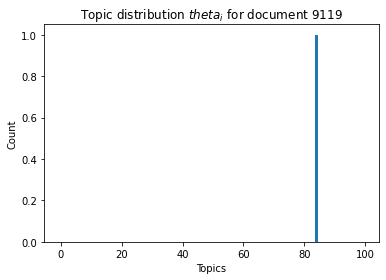

In [69]:
with open('model_var.pkl','rb') as l:
    model = pickle.load(l)
theta_d_z = model['theta_d_z'] 
phi_z_w = model['phi_z_w'] 
n_z = model['n_z'] 

doc = 9119
topic_label = [_ for _ in range(100)]
plt.bar(topic_label,theta_d_z[doc]/ sum(theta_d_z[doc]))
plt.title("Topic distribution $theta_i$ for document {}".format(doc))
plt.xlabel('Topics')
plt.ylabel('Count')


inv_vocabulary = {v: k for k, v in vocabulary.items()}
n_top_words = 10
for topic_idx, topic in enumerate(phi_z_w):
    message = "Topic #%d: " % topic_idx
    message += ", ".join([inv_vocabulary[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
    print(message)
    


# Topic Distribution for Rare words

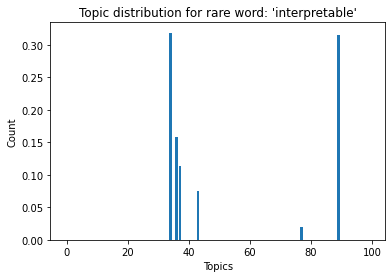

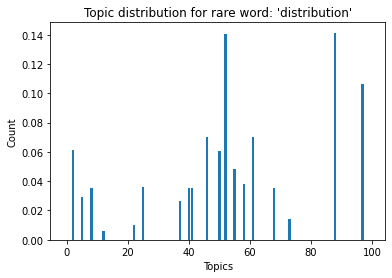

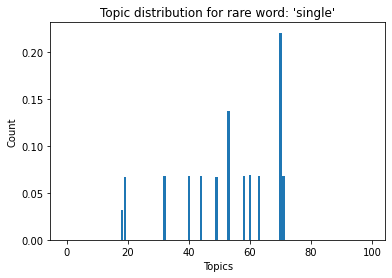

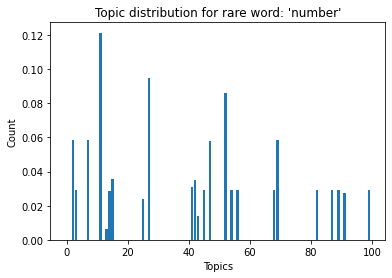

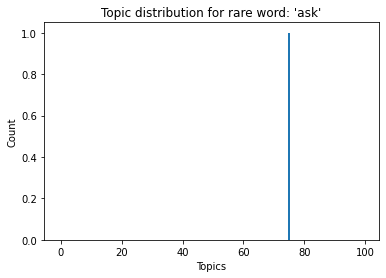

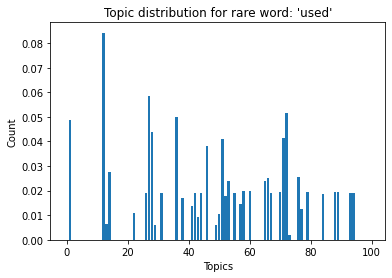

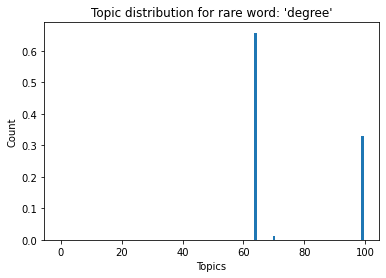

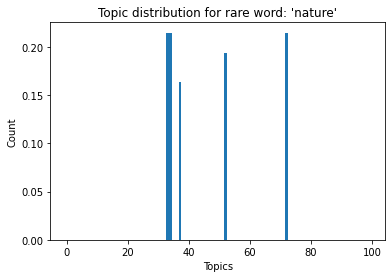

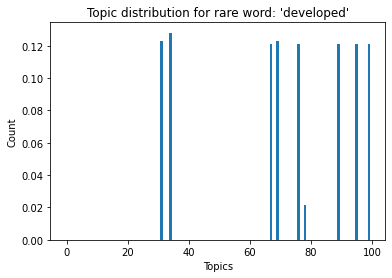

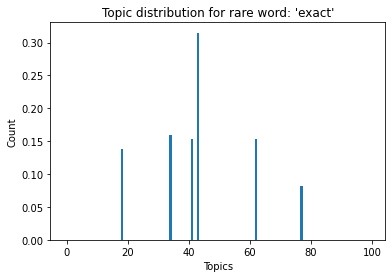

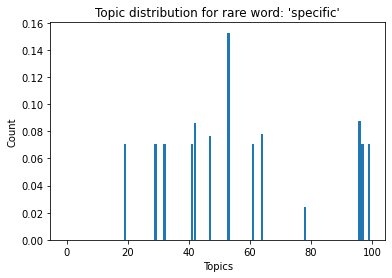

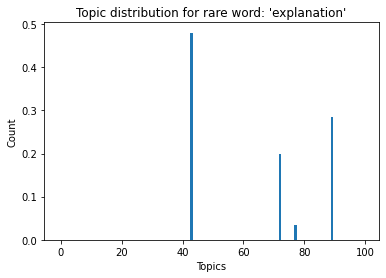

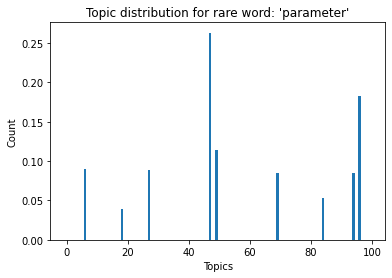

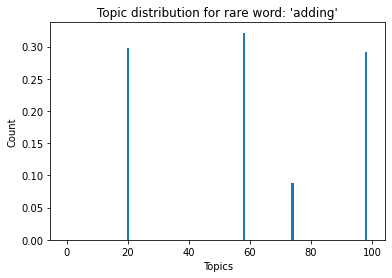

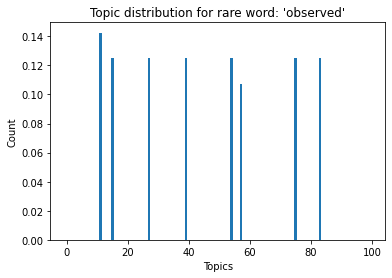

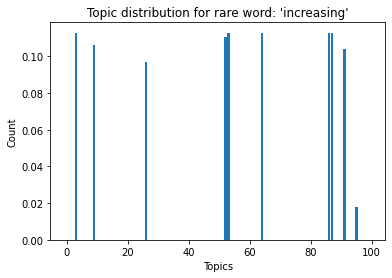

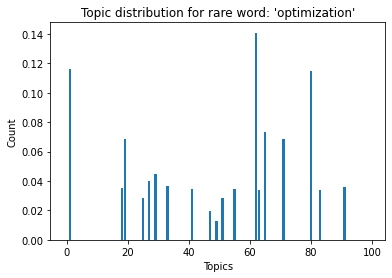

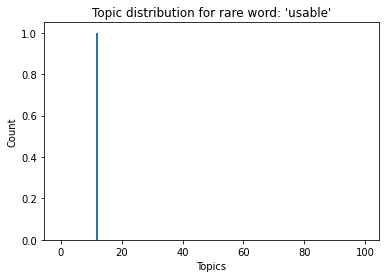

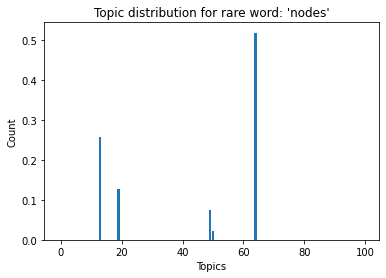

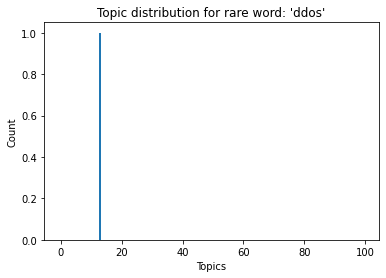

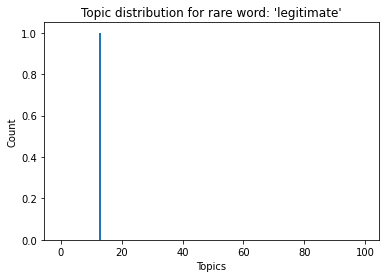

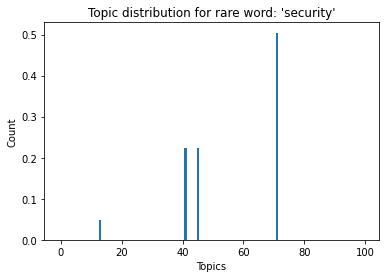

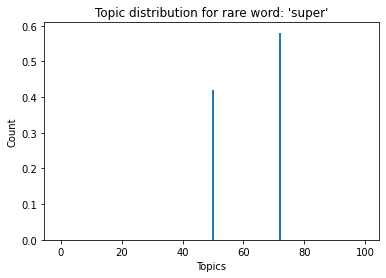

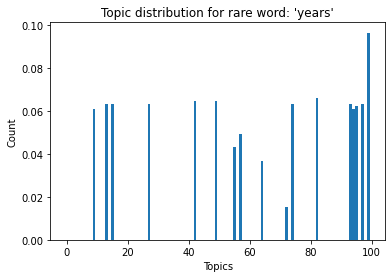

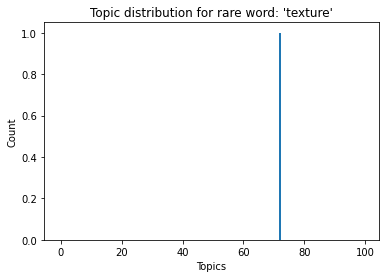

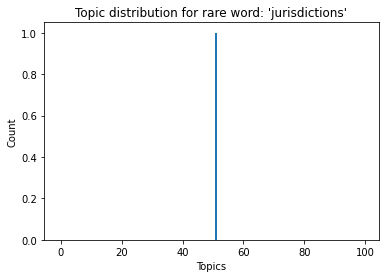

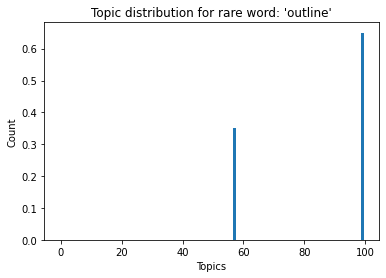

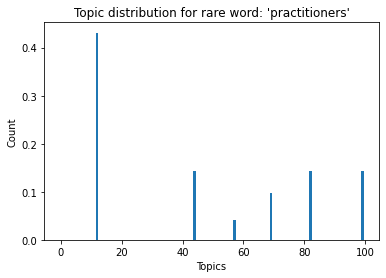

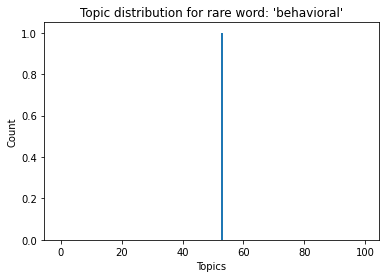

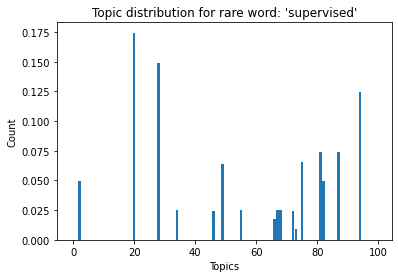

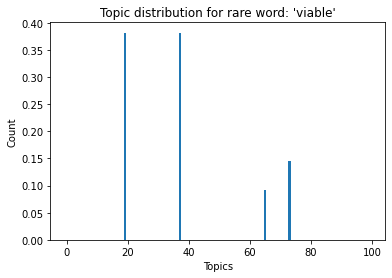

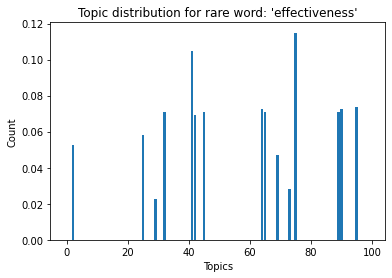

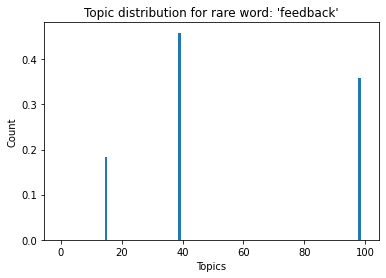

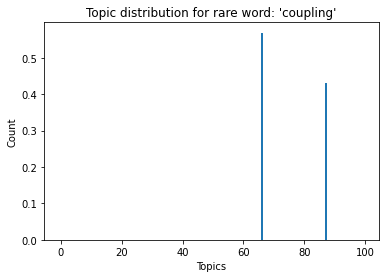

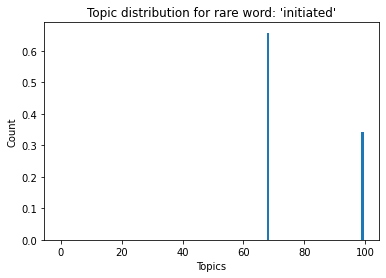

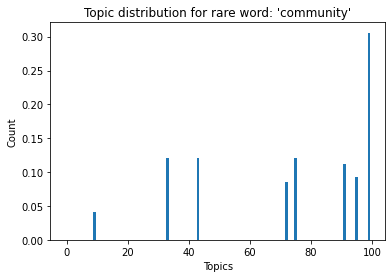

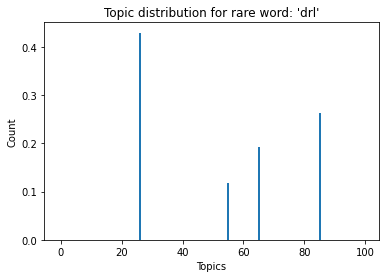

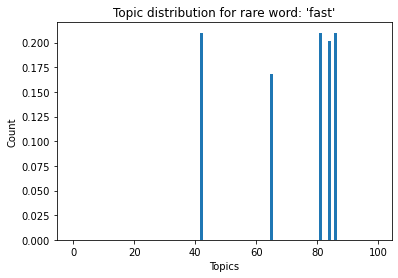

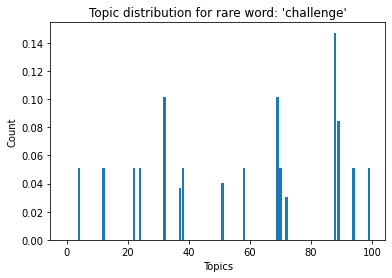

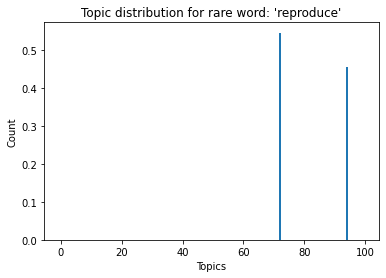

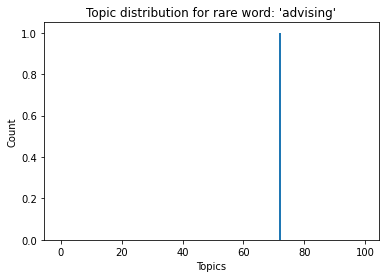

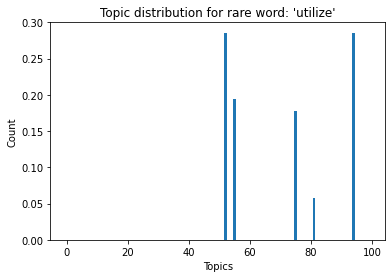

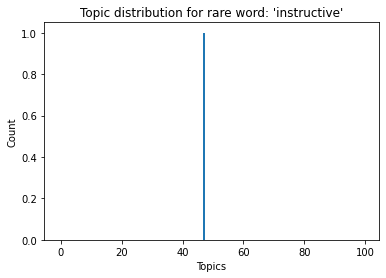

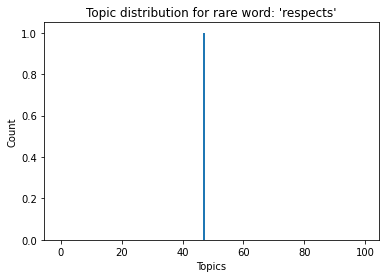

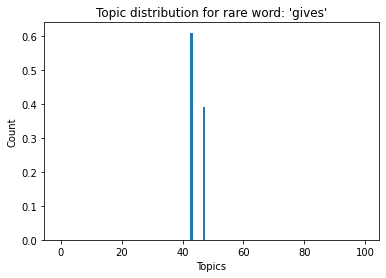

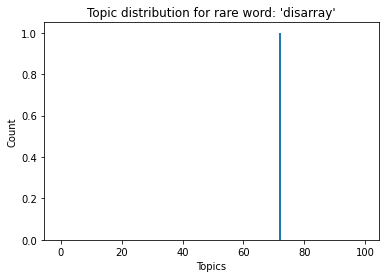

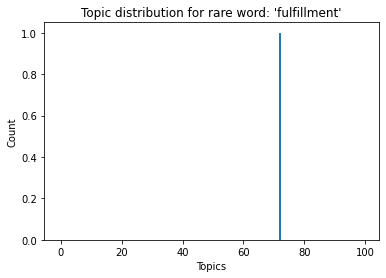

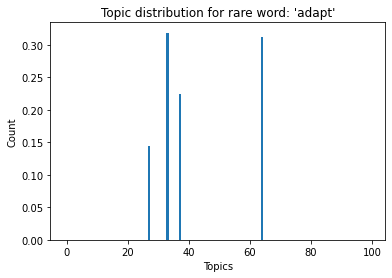

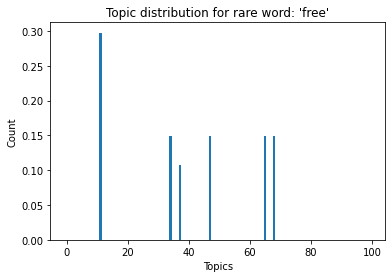

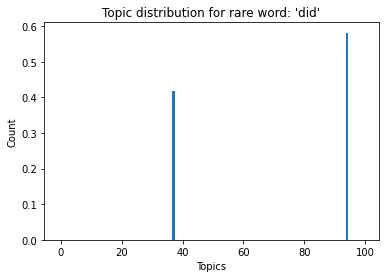

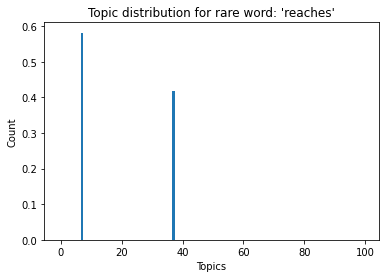

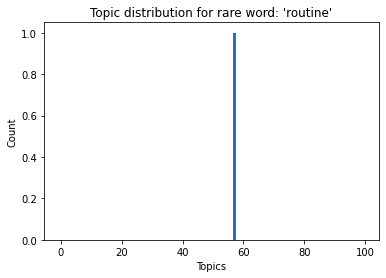

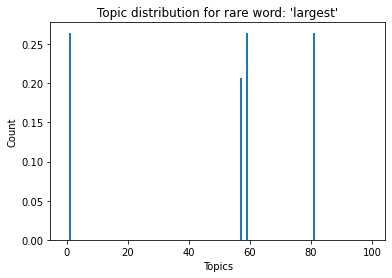

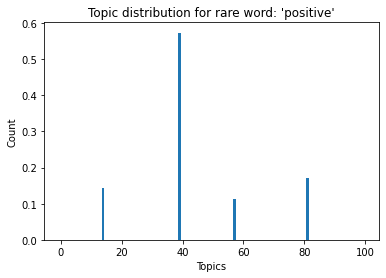

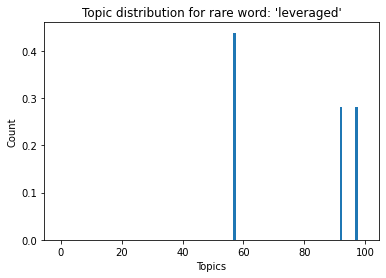

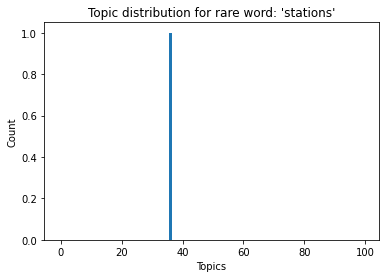

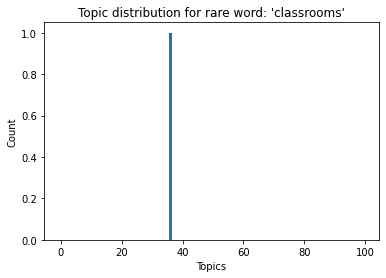

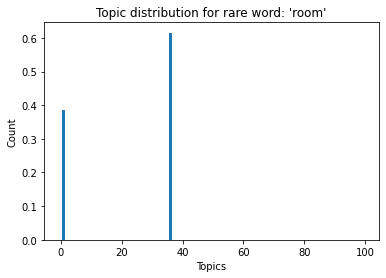

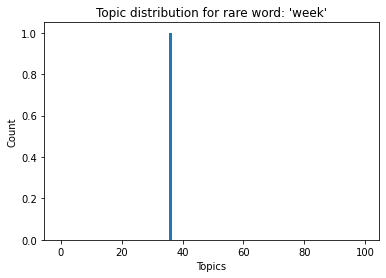

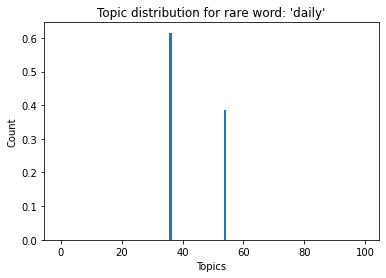

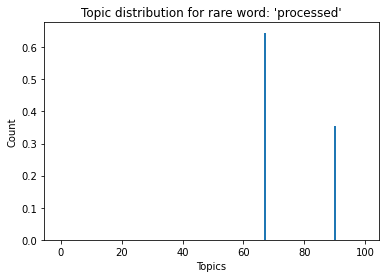

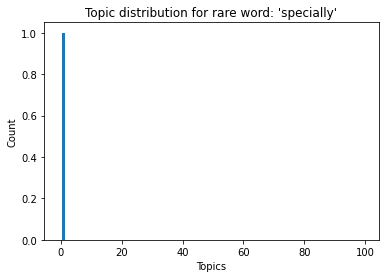

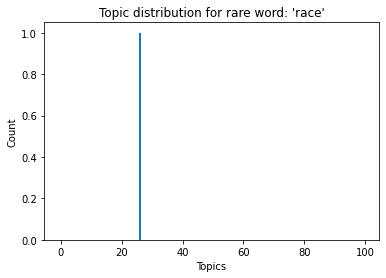

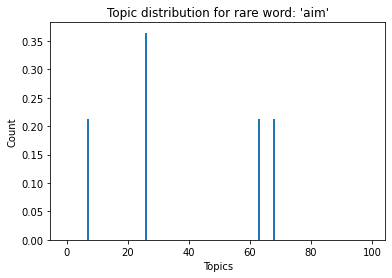

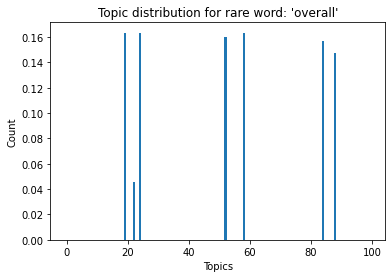

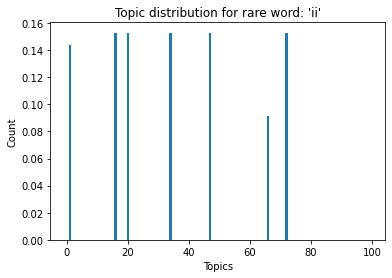

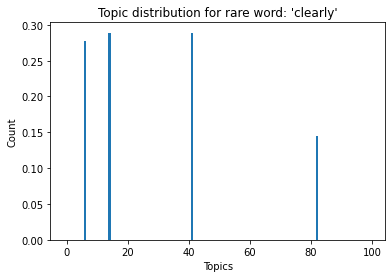

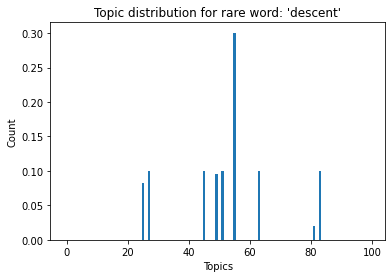

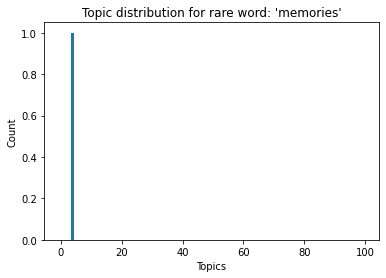

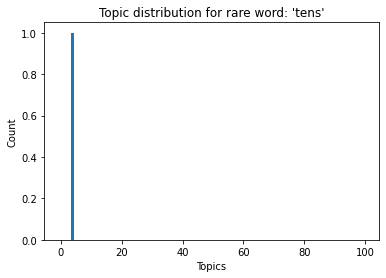

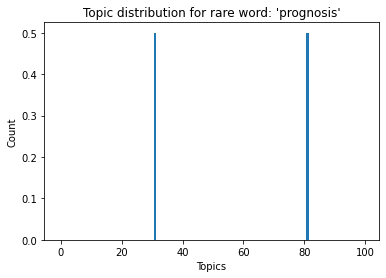

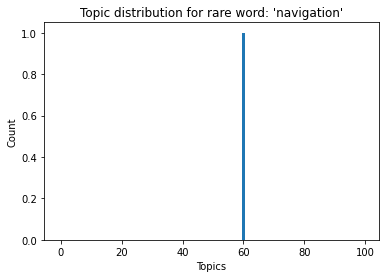

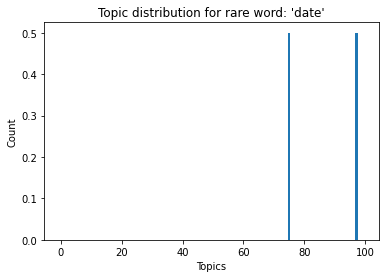

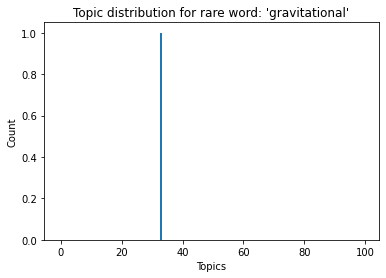

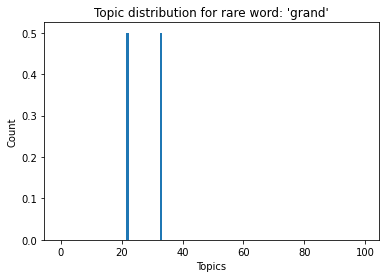

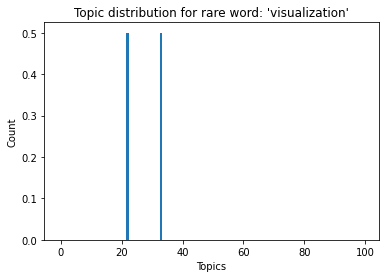

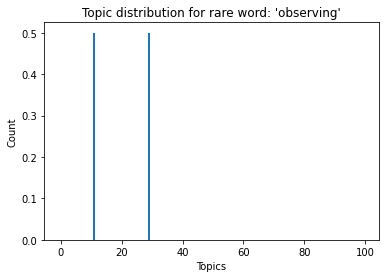

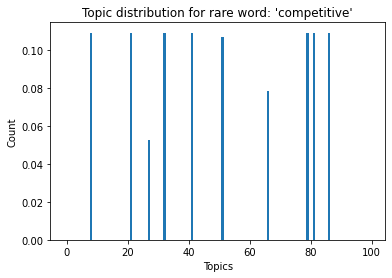

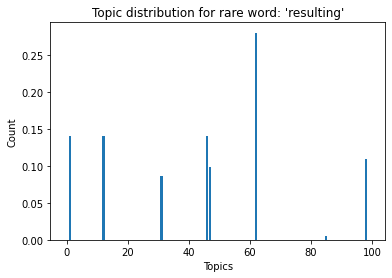

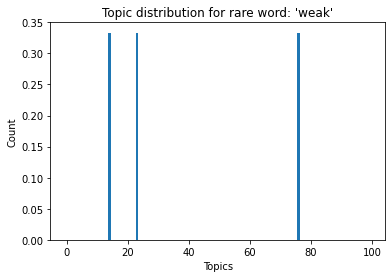

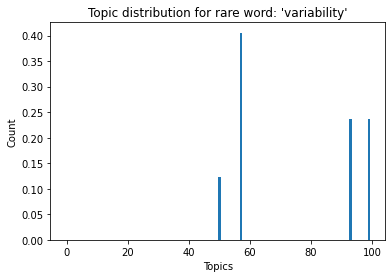

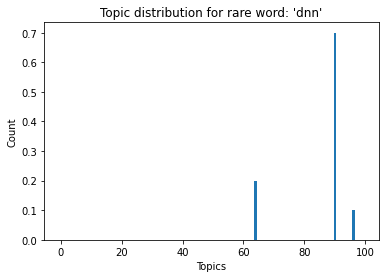

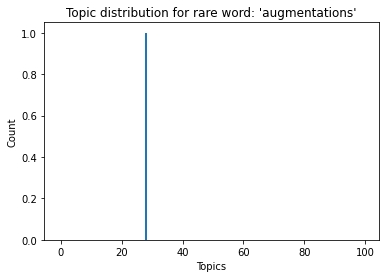

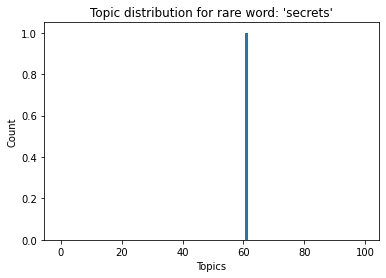

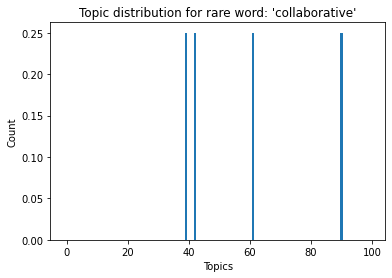

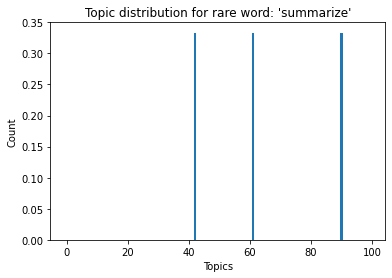

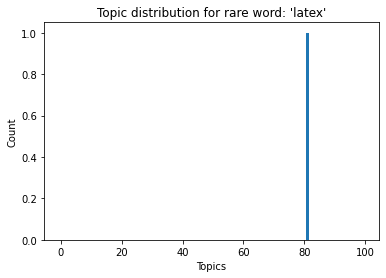

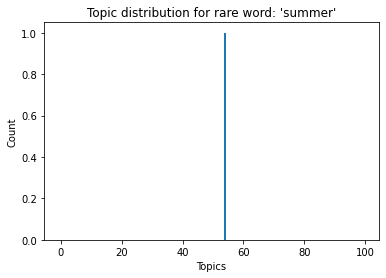

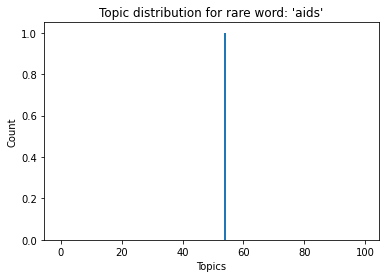

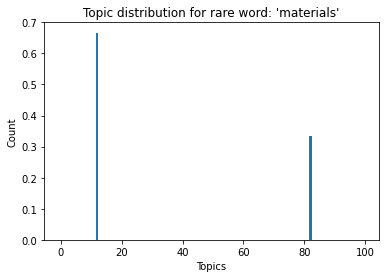

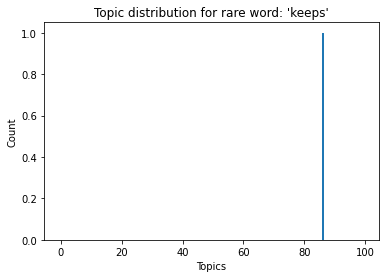

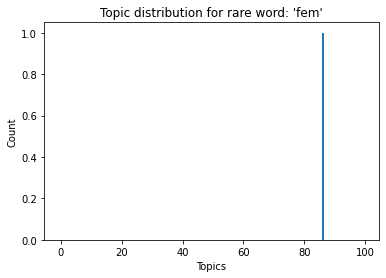

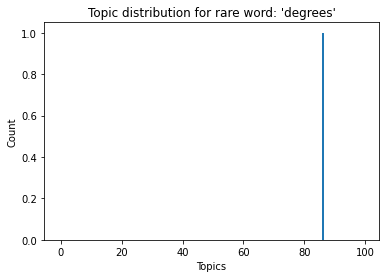

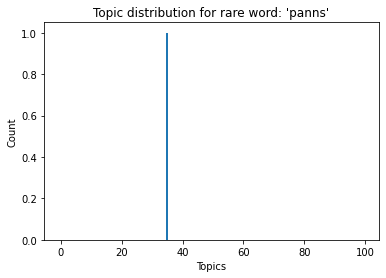

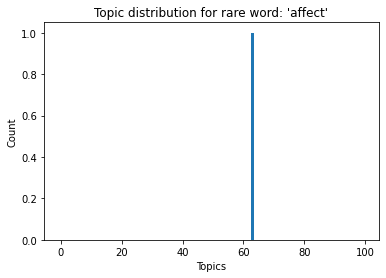

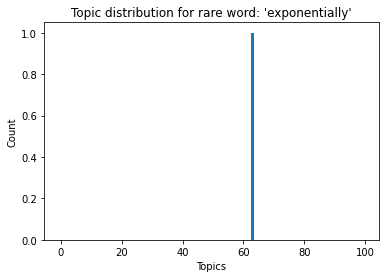

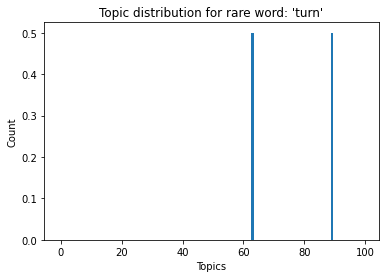

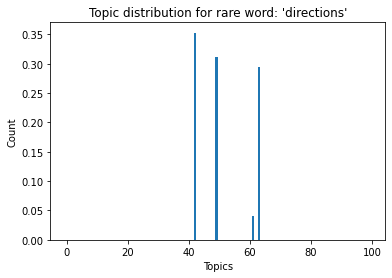

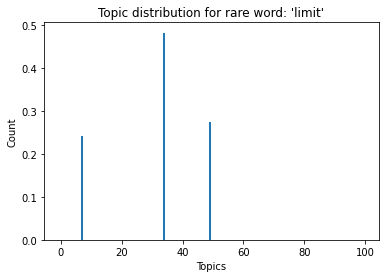

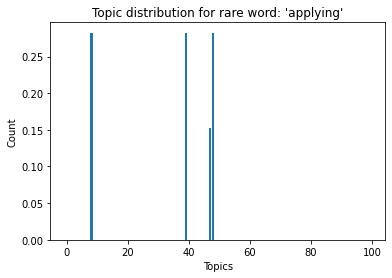

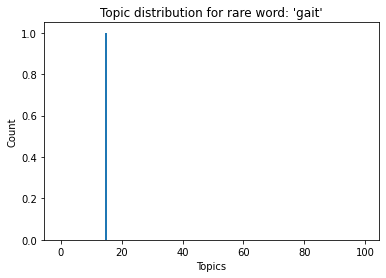

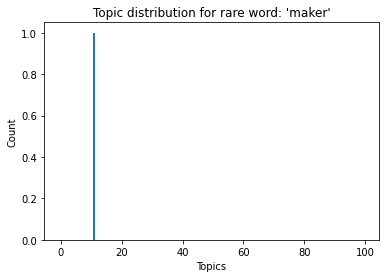

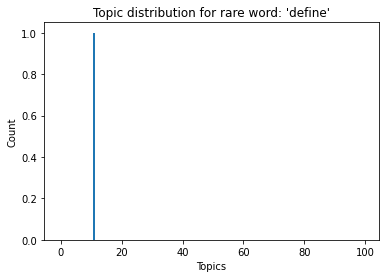

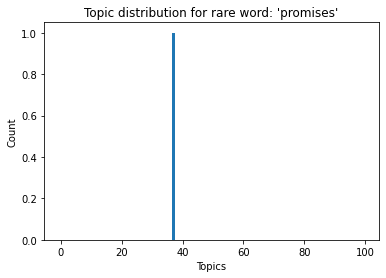

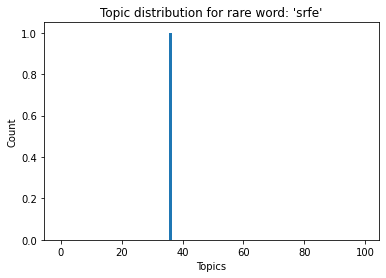

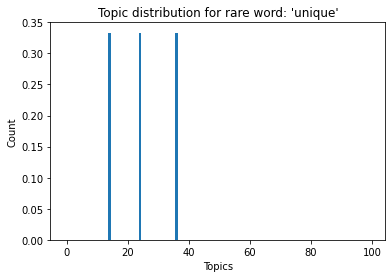

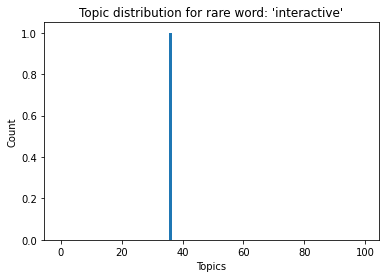

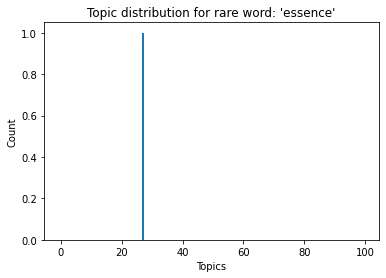

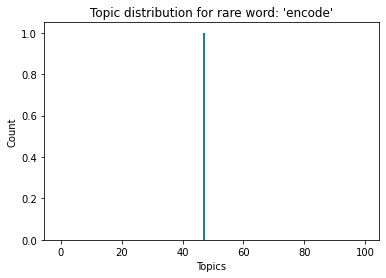

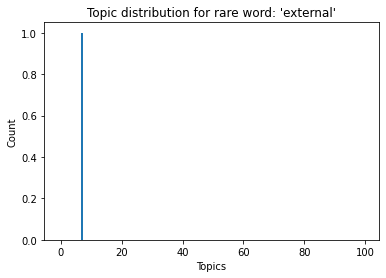

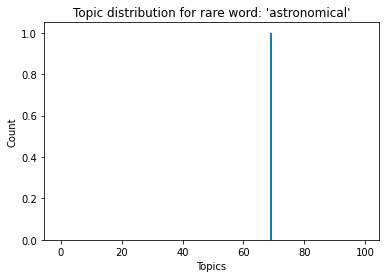

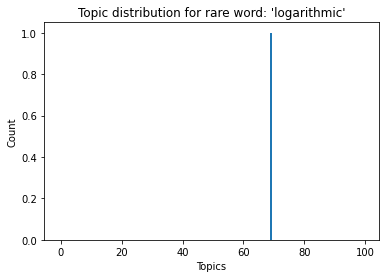

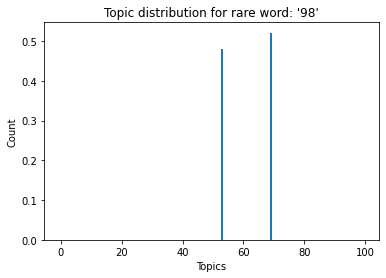

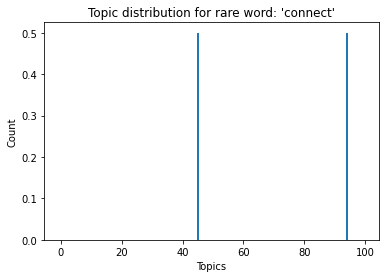

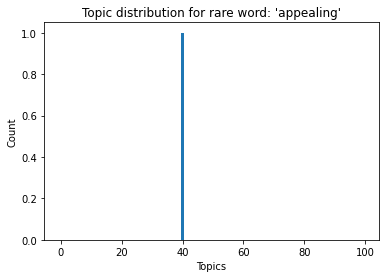

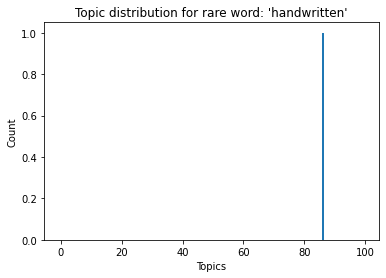

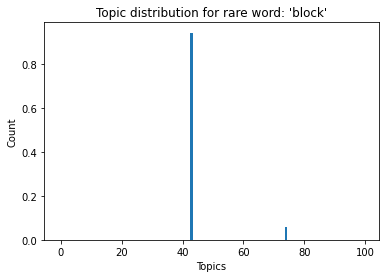

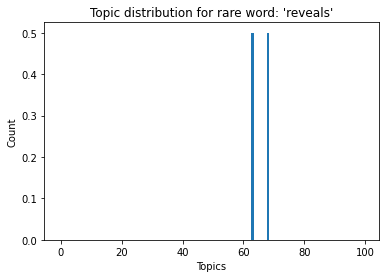

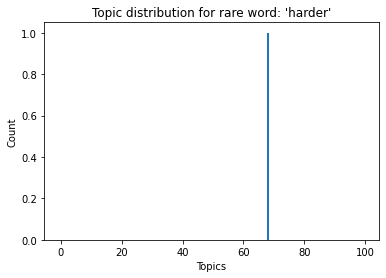

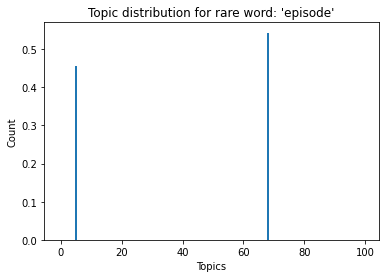

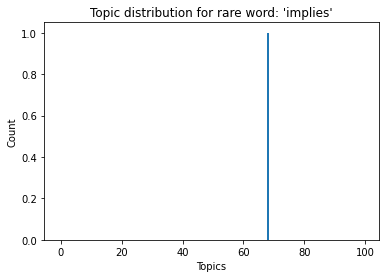

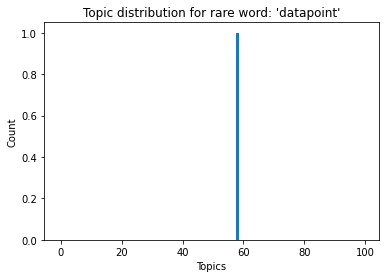

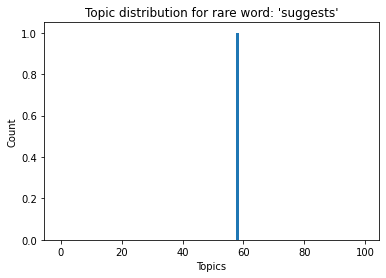

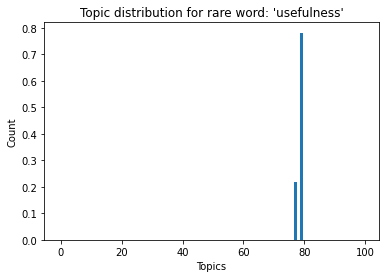

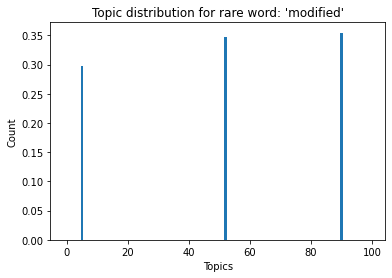

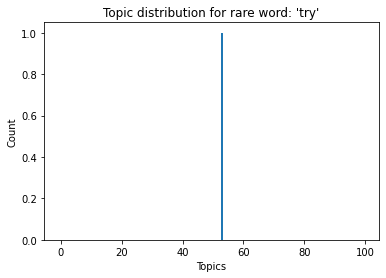

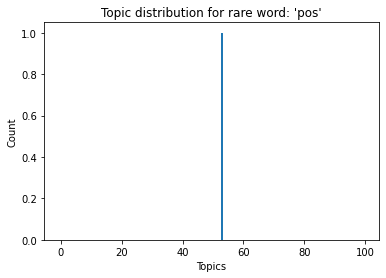

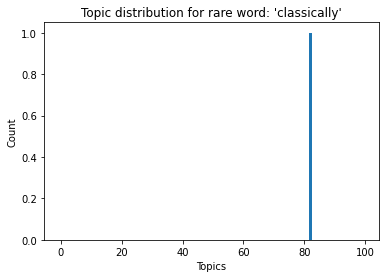

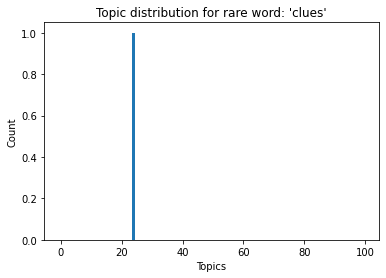

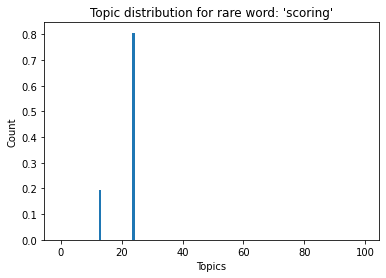

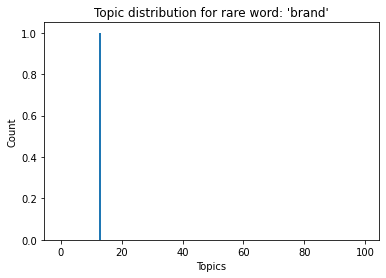

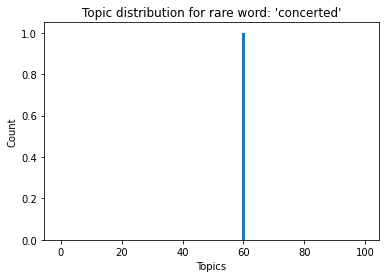

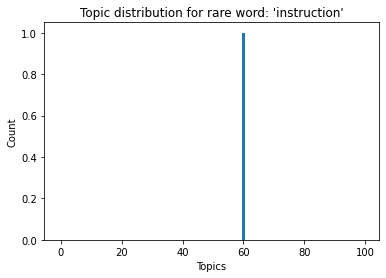

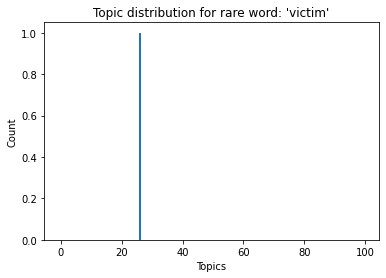

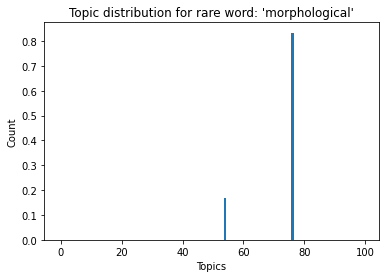

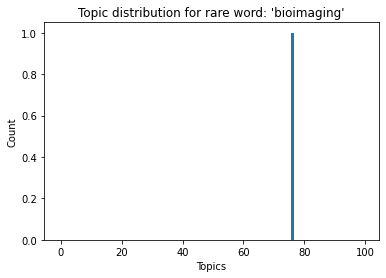

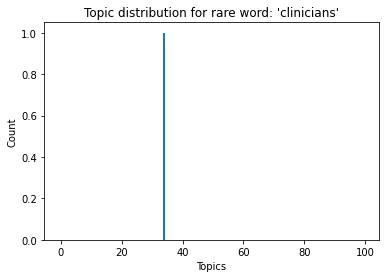

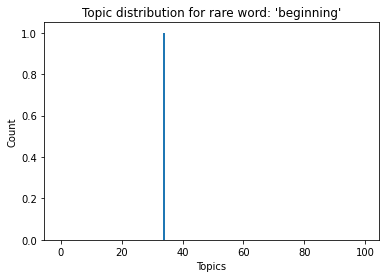

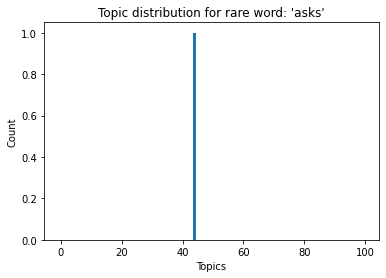

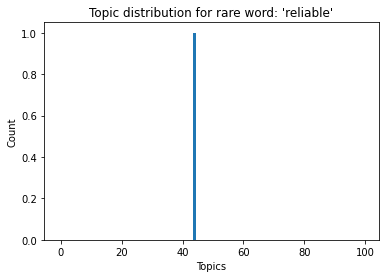

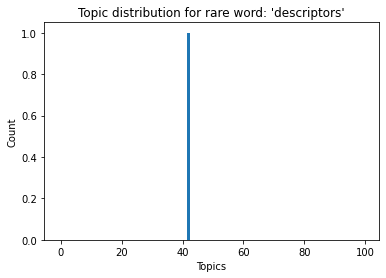

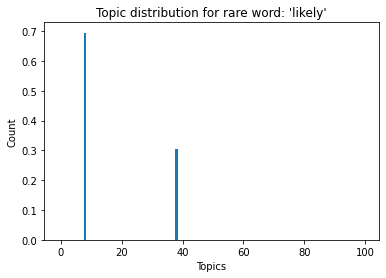

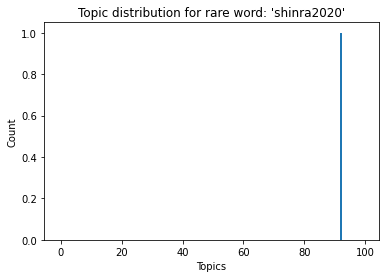

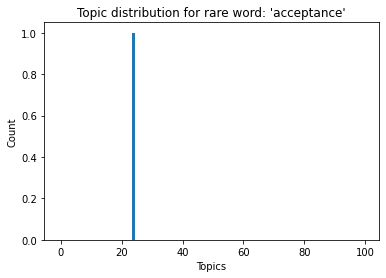

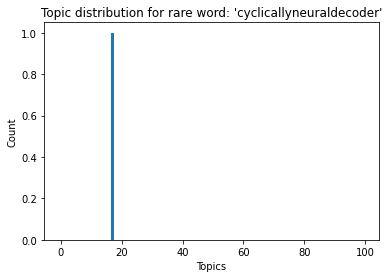

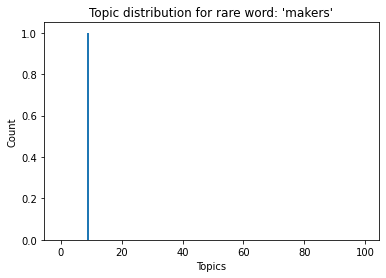

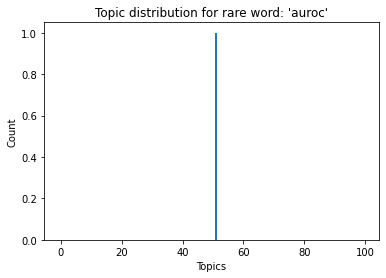

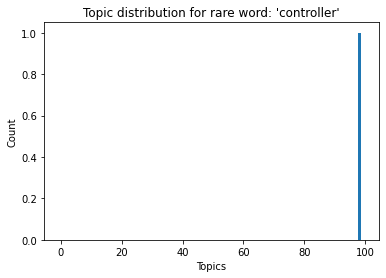

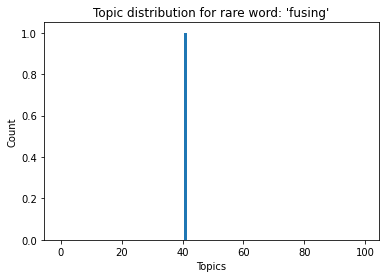

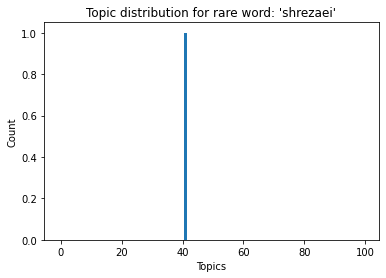

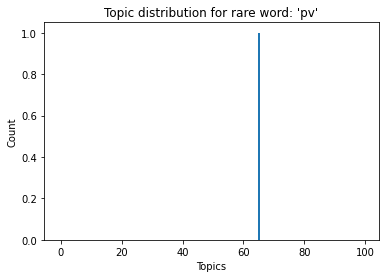

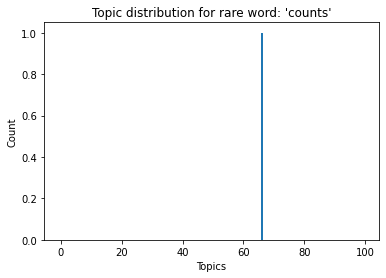

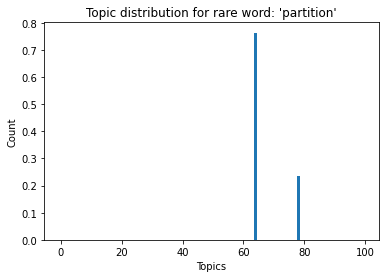

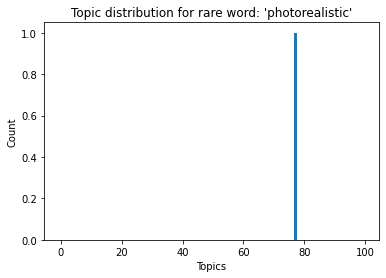

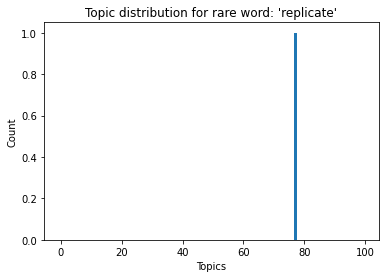

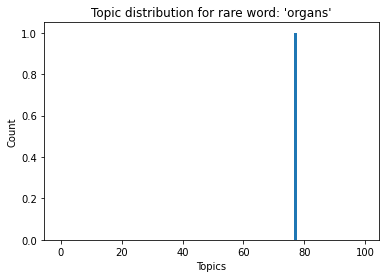

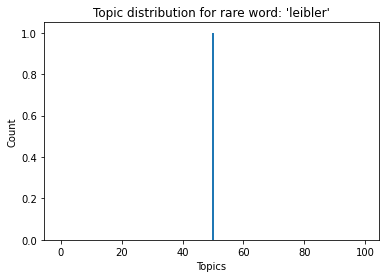

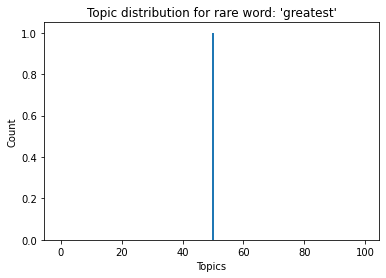

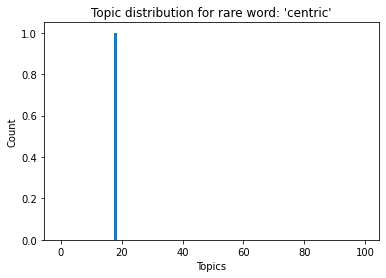

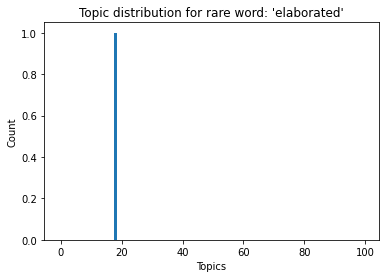

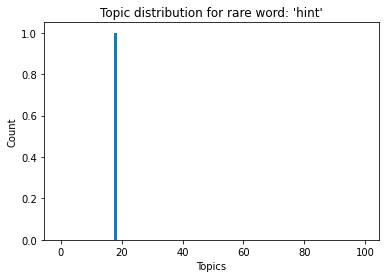

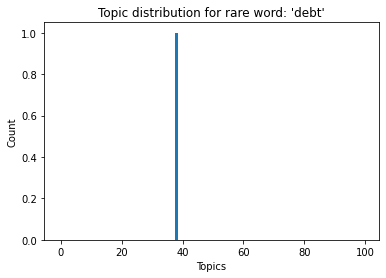

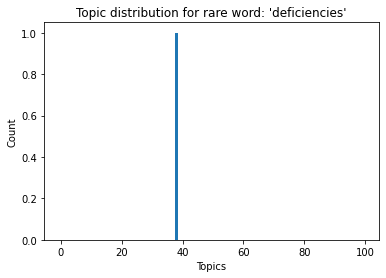

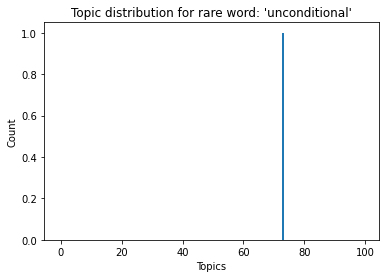

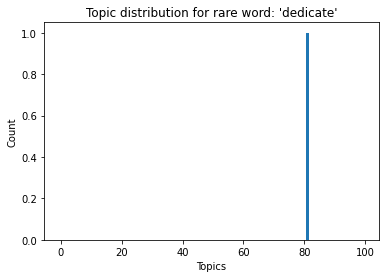

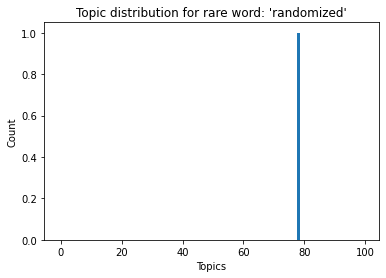

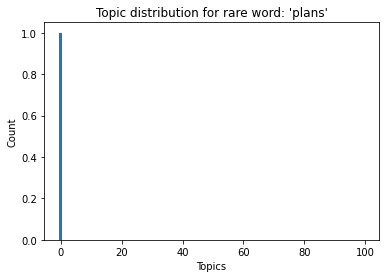

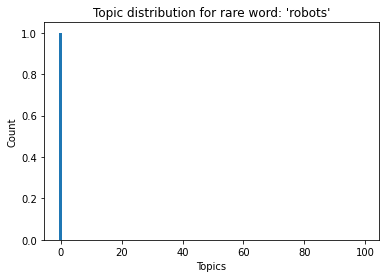

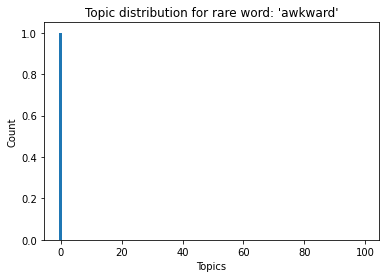

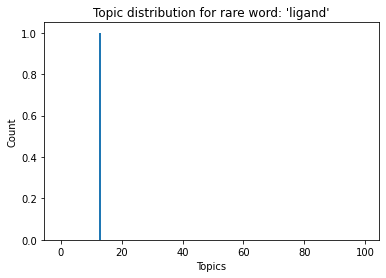

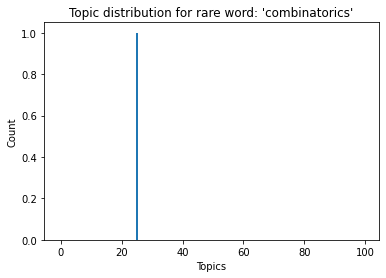

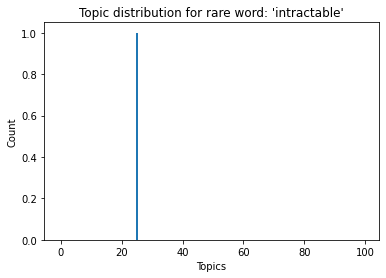

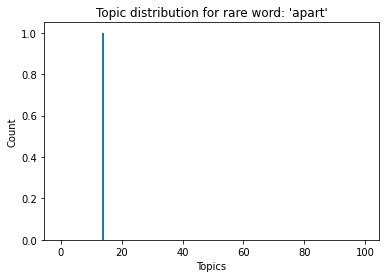

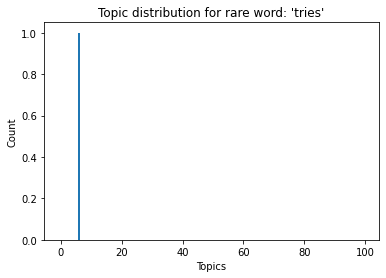

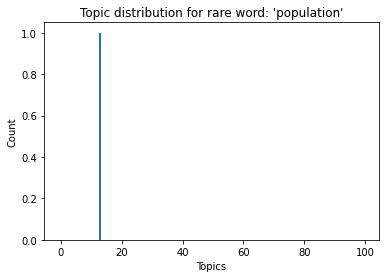

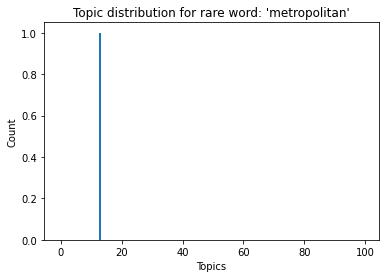

In [57]:
topic_label = [_ for _ in range(100)]
for word in rare_words:
    word_ind = vocabulary[word]
    plt.bar(topic_label,phi_z_w[:,word_ind]/ sum(phi_z_w[:,word_ind]))
    plt.title("Topic distribution for rare word: '{}'".format(word))
    plt.xlabel('Topics')
    plt.ylabel('Count')
    plt.show()

# Topicswise Rare words

In [32]:
rare = [[] for _ in range(100)]
for word in rare_words:
    word_ind = vocabulary[word]
    rare_word_topic = np.argmax(phi_z_w[:,word_ind])

    rare[rare_word_topic].append(word)
for i,t in enumerate(rare):
    print('Topic',i,"containing rare words :",t)

Topic 0 containing rare words : ['plans', 'robots', 'awkward']
Topic 1 containing rare words : ['largest', 'specially']
Topic 2 containing rare words : []
Topic 3 containing rare words : ['increasing']
Topic 4 containing rare words : ['memories', 'tens']
Topic 5 containing rare words : []
Topic 6 containing rare words : ['tries']
Topic 7 containing rare words : ['reaches', 'external']
Topic 8 containing rare words : ['competitive', 'applying', 'likely']
Topic 9 containing rare words : ['makers']
Topic 10 containing rare words : []
Topic 11 containing rare words : ['number', 'observed', 'free', 'observing', 'maker', 'define']
Topic 12 containing rare words : ['used', 'usable', 'practitioners', 'materials']
Topic 13 containing rare words : ['ddos', 'legitimate', 'brand', 'ligand', 'population', 'metropolitan']
Topic 14 containing rare words : ['clearly', 'weak', 'unique', 'apart']
Topic 15 containing rare words : ['gait']
Topic 16 containing rare words : ['ii']
Topic 17 containing rare w

# Topic Distribution

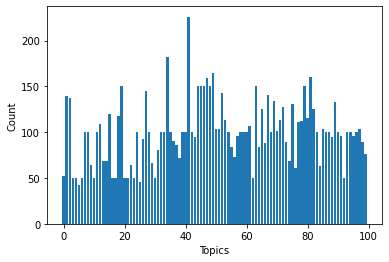

In [54]:
topics = np.argmax(theta_d_z,axis=1)
topic_counts = [0 for _ in range(100)]
topic_label = [_ for _ in range(100)]
for i in topics:
    topic_counts[i]+=1
plt.bar(topic_label,topic_counts)
plt.xlabel('Topics')
plt.ylabel('Count')
plt.show()

In [58]:
phi_z_w.shape

(100, 5061)